<a href="https://colab.research.google.com/github/Sergey10603/tl_open/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22TD_multiclass_rock_paper_scissors_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
!wget --no-check-certificate \
    https://panel.ingalyatsii.ru/ml/lights_learn.zip \
    -O /tmp/lights_learn.zip
  
!wget --no-check-certificate \
    https://panel.ingalyatsii.ru/ml/lights_test.zip \
    -O /tmp/lights_test.zip

--2021-07-25 08:51:19--  https://panel.ingalyatsii.ru/ml/lights_learn.zip
Resolving panel.ingalyatsii.ru (panel.ingalyatsii.ru)... 92.53.96.116, 2a03:6f00:1::5c35:60a7
Connecting to panel.ingalyatsii.ru (panel.ingalyatsii.ru)|92.53.96.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171768855 (164M) [application/zip]
Saving to: ‘/tmp/lights_learn.zip’

/tmp/lights_learn.z 100%[===================>] 163.81M  24.4MB/s    in 7.6s    

2021-07-25 08:51:27 (21.6 MB/s) - ‘/tmp/lights_learn.zip’ saved [171768855/171768855]

--2021-07-25 08:51:27--  https://panel.ingalyatsii.ru/ml/lights_test.zip
Resolving panel.ingalyatsii.ru (panel.ingalyatsii.ru)... 92.53.96.116, 2a03:6f00:1::5c35:60a7
Connecting to panel.ingalyatsii.ru (panel.ingalyatsii.ru)|92.53.96.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50757152 (48M) [application/zip]
Saving to: ‘/tmp/lights_test.zip’

/tmp/lights_test.zi 100%[===================>]  48.41M  17.4MB/s    

In [4]:
import os
import zipfile

local_zip = '/tmp/lights_learn.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/lights_test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [5]:
rock_dir = os.path.join('/tmp/lights_learn/cell')
paper_dir = os.path.join('/tmp/lights_learn/nastol')
scissors_dir = os.path.join('/tmp/lights_learn/podves')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 2307
total training paper images: 914
total training scissors images: 3410
['5971_mantra.png', 'SLE201112-01_evoluce.png', 'CL401133_citilux.png', '67085-12_globo_new.png', '372011207_mw_light.png', '8270528_spot_light.png', 'SPRING PL5 FUME_ideal_lux.png', '41705.png', 'TL1133-8D_toplight.png', 'OML-56307-03_omnilux.png']
['90829_eglo.png', '43212_eglo.png', 'CL803011_citilux.png', 'VOGA TL1_ideal_lux.png', 'OML-82114-01_omnilux.png', 'A1012LT-1BK.png', 'KD-331  C14_camelion.png', 'LOFT4402T-WH_loft_it.png', 'UF-301  C07_camelion.png', '317034201_mw_light.png']
['ARM020-00-W_maytoni.png', '631012405_mw_light.png', 'V5146-0~10_vitaluce.png', '65001H1_globo_new.png', 'A6503SP-4AB.png', 'A3320SP-1PB.png', 'LSC-2506-03_lussole.png', 'A4175SP-1WH.png', 'LOFT9915-WH_loft_it.png', 'A4579SP-1WG.png']


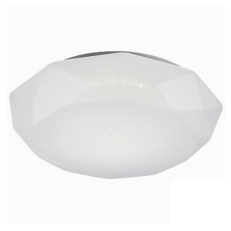

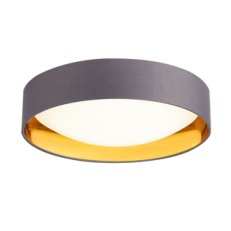

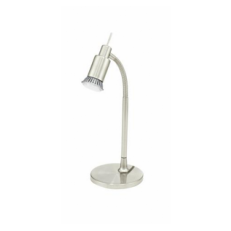

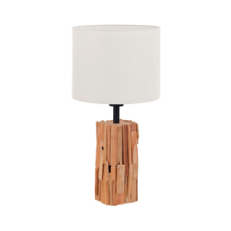

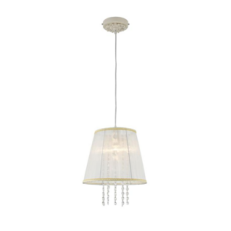

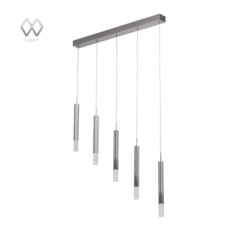

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [7]:

import urllib.request
import os
import tensorflow as tf
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(300, 300, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final gmoid layer for classification
x = layers.Dense(3, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

last layer output shape:  (None, 17, 17, 768)


In [9]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/lights_learn"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=4,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/lights_test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(300,300),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(300,300),
	class_mode='categorical'
)
# model.load_weights("rps.h5",by_name=True,)
history = model.fit(train_generator, epochs=1, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")


Found 6631 images belonging to 3 classes.
Found 2139 images belonging to 3 classes.
208/208 [==============================] - 154s 654ms/step - loss: 7.1954 - acc: 0.8281 - val_loss: 0.5663 - val_acc: 0.8817


In [12]:
# названия классов

dict_class = train_generator.class_indices

# для удобства поворачиваем словарь
name_class = {}
for key, value in dict_class.items():
  name_class[value] = key

print(name_class)

{0: 'cell', 1: 'nastol', 2: 'podves'}


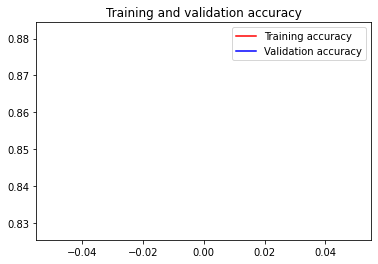

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x /= 255

  # images = np.vstack([x])
  prediction = model.predict(x)
  print(fn)
  print(prediction)

Saving 902-204-01_velante.png to 902-204-01_velante.png
902-204-01_velante.png
[[1.2744630e-04 9.9986839e-01 4.1966987e-06]]


In [18]:
# отображаем прогноз соответствия картинки каждой из категорий

for id, name in name_class.items():
  val = prediction[0][id]
  print(name + ' -> ' + str(val))

cell -> 0.0001274463
nastol -> 0.9998684
podves -> 4.1966987e-06


In [19]:
# Макс результат у класса

id_class_max = np.argmax(prediction)
print("MAX класс:", name_class[id_class_max])

MAX класс: nastol
